# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.
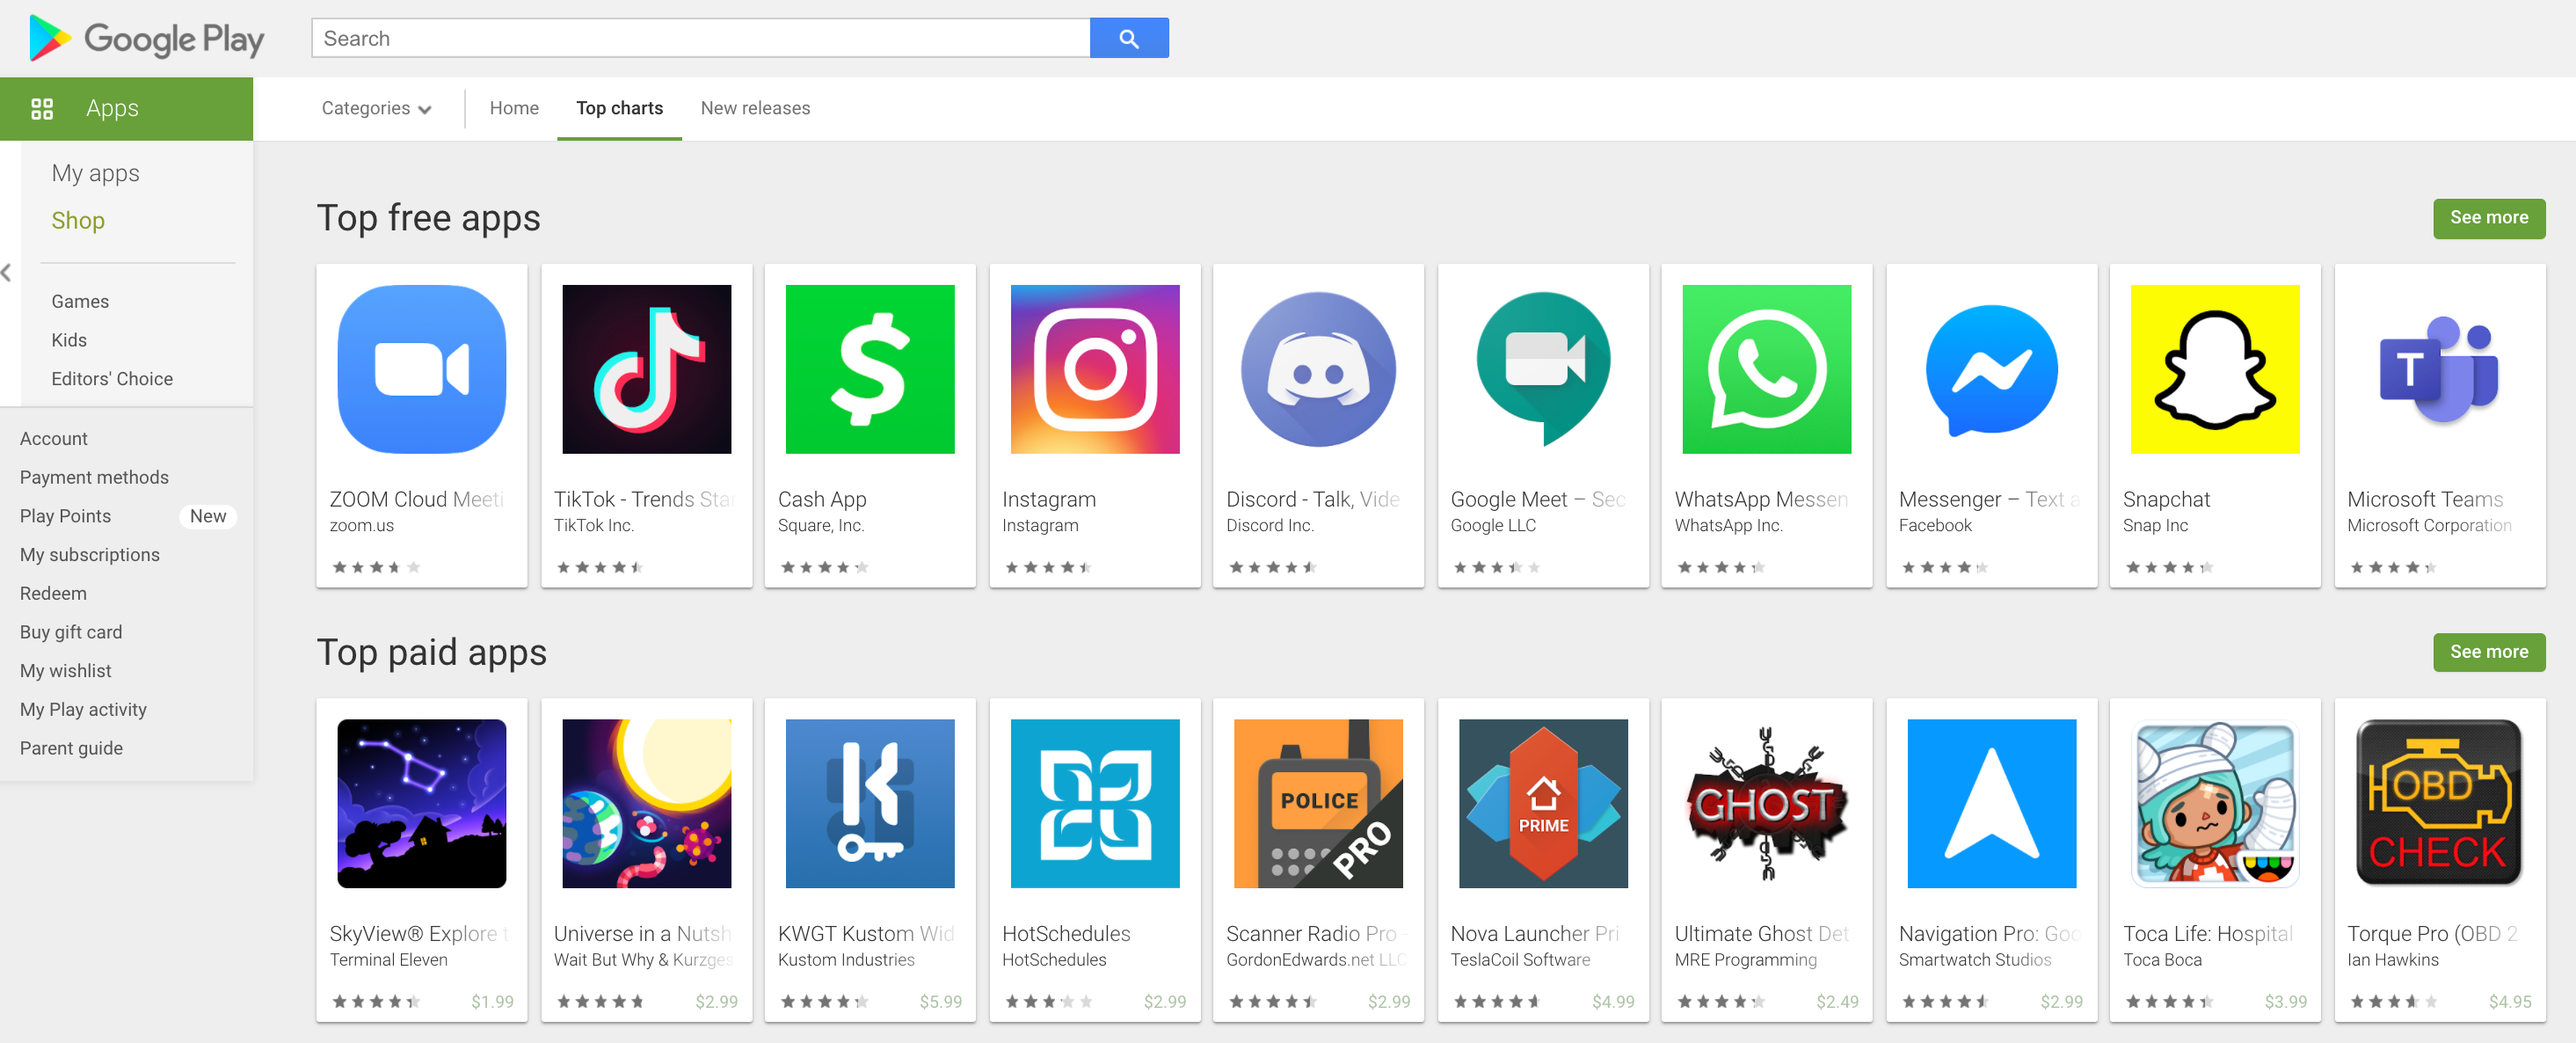

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [70]:
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

# Notebook Presentation

In [103]:

pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [72]:
df_apps = pd.read_csv('apps.csv')

# Data Cleaning

In [73]:
df_apps.shape

(10841, 12)

In [74]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')

**The .sample(n) method will give us n random rows. This is another handy way to inspect our DataFrame.**

In [75]:
df_apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
861,Mindvalley U Tallinn 2018,EVENTS,5.00,1,21.00,100,Free,0,Everyone,Events,"July 3, 2018",4.4 and up
9797,Sound Meter,TOOLS,4.70,88993,1.50,"10,000,000",Free,0,Everyone,Tools,"June 10, 2018",2.3 and up
8272,I Know Stuff,GAME,4.20,214923,36.00,"5,000,000",Free,0,Everyone,Trivia,"July 31, 2018",4.1 and up
9033,OfficeSuite Pro + PDF (Trial),BUSINESS,4.20,88073,7.20,"10,000,000",Free,0,Everyone,Business,"July 9, 2018",Varies with device
10392,slither.io,GAME,4.40,5234825,36.00,"100,000,000",Free,0,Everyone,Action,"November 14, 2017",2.3 and up


### Drop Unused Columns

 Removing the columns called `Last_Updated` and `Android_Version` from the DataFrame. As they are not useful

In [76]:
df_apps.drop(['Last_Updated','Android_Ver'], axis=1, inplace=True)


In [77]:
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business


### Find and Remove NaN values in Ratings

 How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [78]:
df_apps.isna()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,False,False,True,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,True,False,False,False
4,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False
10838,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False


In [79]:
df_apps_clean = df_apps.dropna()

In [80]:
df_apps_clean.shape

(9367, 10)

### Find and Remove Duplicates

check if there are  any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [81]:
duplicated_rows = df_apps_clean[df_apps_clean.duplicated()]
print(duplicated_rows.shape)
duplicated_rows.head()

(476, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
946,420 BZ Budeze Delivery,MEDICAL,5.00,2,11.00,100,Free,0,Mature 17+,Medical
1133,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating
1196,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.40,8,6.50,100,Paid,$12.99,Everyone,Medical
1231,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1247,Chat Kids - Chat Room For Kids,DATING,4.70,6,4.90,100,Free,0,Mature 17+,Dating


In [82]:
df_apps_clean[df_apps_clean.App == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [83]:
df_apps_clean = df_apps_clean.drop_duplicates(subset = ['App', 'Type','Price'])

In [84]:
df_apps_clean[df_apps_clean.App == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social


In [85]:
df_apps_clean.shape

(8199, 10)

# Find Highest Rated Apps



In [86]:
df_apps_clean.sort_values('Rating', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
1230,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1227,AJ Men's Grooming,LIFESTYLE,5.00,2,22.00,100,Free,0,Everyone,Lifestyle
1224,FK Dedinje BGD,SPORTS,5.00,36,2.60,100,Free,0,Everyone,Sports
1223,CB VIDEO VISION,PHOTOGRAPHY,5.00,13,2.60,100,Free,0,Everyone,Photography


# Find 5 Largest Apps in terms of Size (MBs)



In [87]:
df_apps_clean.sort_values('Size_MBs', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness


# Find the 5 App with Most Reviews



In [88]:
df_apps_clean.sort_values('Reviews', ascending=False).head(50)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy
10744,Clean Master- Space Cleaner & Antivirus,TOOLS,4.70,42916526,3.40,"500,000,000",Free,0,Everyone,Tools
10835,Subway Surfers,GAME,4.50,27722264,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
10746,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.70,24900999,3.40,"500,000,000",Free,0,Everyone,Tools
10584,Clash Royale,GAME,4.60,23133508,97.00,"100,000,000",Free,0,Everyone 10+,Strategy


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [89]:
ratings = df_apps_clean.Content_Rating.value_counts()
ratings

Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

**To create a pie chart we simply call px.pie() and then .show() the resulting figure. Plotly refers to all their figures, be they line charts, bar charts, or pie charts as graph_objects.**



In [90]:
px.pie(labels = ratings.index, values = ratings.values)


If you’d like to configure other aspects of the chart, that you can’t see in the list of parameters, you can call a method called .update_traces(). In plotly lingo, “traces” refer to graphical marks on a figure. Think of “traces” as collections of attributes. Here we update the traces to change how the text is displayed.

In [91]:
fig = px.pie(labels=ratings.index,
values=ratings.values,
title="Content Rating",
names=ratings.index,
)
fig.update_traces(textposition='outside', textinfo='percent+label')
 
fig.show()

**To create a donut 🍩 chart, we can simply add a value for the hole argument:**

In [92]:
fig = px.pie(labels=ratings.index,
values=ratings.values,
title="Content Rating",
names=ratings.index,
hole=0.6,
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
 
fig.show()

# Numeric Type Conversion: Examine the Number of Installs

 How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [93]:
df_apps_clean.Installs.describe

<bound method NDFrame.describe of 21                   1
28                   1
47                   1
82                   5
99                   5
             ...      
10824    1,000,000,000
10828    1,000,000,000
10829    1,000,000,000
10831    1,000,000,000
10835    1,000,000,000
Name: Installs, Length: 8199, dtype: object>

In [94]:
df_apps_clean.info

<bound method DataFrame.info of                                                    App            Category  \
21                                 KBA-EZ Health Guide             MEDICAL   
28                                            Ra Ga Ba                GAME   
47                                             Mu.F.O.                GAME   
82                                    Brick Breaker BR                GAME   
99     Anatomy & Physiology Vocabulary Exam Review App             MEDICAL   
...                                                ...                 ...   
10824                                     Google Drive        PRODUCTIVITY   
10828                                          YouTube       VIDEO_PLAYERS   
10829                          Google Play Movies & TV       VIDEO_PLAYERS   
10831                                      Google News  NEWS_AND_MAGAZINES   
10835                                   Subway Surfers                GAME   

       Rating   Reviews  Size_M

In [95]:
df_apps_clean.Installs = df_apps_clean.Installs.astype(str).str.replace(',', "")

In [96]:
df_apps_clean.Installs = pd.to_numeric(df_apps_clean.Installs)
df_apps_clean[['App', 'Installs']].groupby('Installs').count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,698
5000,425
10000,988


# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [98]:
df_apps_clean.Price.describe

<bound method NDFrame.describe of 21           0
28       $1.49
47       $0.99
82           0
99           0
         ...  
10824        0
10828        0
10829        0
10831        0
10835        0
Name: Price, Length: 8199, dtype: object>

In [100]:
df_apps_clean.Price = df_apps_clean.Price.astype(str).str.replace('$', "")
df_apps_clean.Price = pd.to_numeric(df_apps_clean.Price)
 
df_apps_clean.sort_values('Price', ascending=False).head(20)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle
2461,I AM RICH PRO PLUS,FINANCE,4.00,36,41.00,1000,Paid,399.99,Everyone,Finance
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,50000,Paid,399.99,Everyone,Finance
3145,I am rich(premium),FINANCE,3.50,472,0.94,5000,Paid,399.99,Everyone,Finance
3554,💎 I'm rich,LIFESTYLE,3.80,718,26.00,10000,Paid,399.99,Everyone,Lifestyle
5765,I am rich,LIFESTYLE,3.80,3547,1.80,100000,Paid,399.99,Everyone,Lifestyle
1946,I am rich (Most expensive app),FINANCE,4.10,129,2.70,1000,Paid,399.99,Teen,Finance
2775,I Am Rich Pro,FAMILY,4.40,201,2.70,5000,Paid,399.99,Everyone,Entertainment
3221,I am Rich Plus,FAMILY,4.00,856,8.70,10000,Paid,399.99,Everyone,Entertainment
3114,I am Rich,FINANCE,4.30,180,3.80,5000,Paid,399.99,Everyone,Finance


### The most expensive apps sub $250

In [101]:
df_apps_clean = df_apps_clean[df_apps_clean['Price'] < 250]
df_apps_clean.sort_values('Price', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2281,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32.00,1000,Paid,79.99,Everyone,Medical
1407,LTC AS Legal,MEDICAL,4.00,6,1.30,100,Paid,39.99,Everyone,Medical
2629,I am Rich Person,LIFESTYLE,4.20,134,1.80,1000,Paid,37.99,Everyone,Lifestyle
2481,A Manual of Acupuncture,MEDICAL,3.50,214,68.00,1000,Paid,33.99,Everyone,Medical
2463,PTA Content Master,MEDICAL,4.20,64,41.00,1000,Paid,29.99,Everyone,Medical


When we look at the top 5 apps now, we see that 4 out of 5 are medical apps.

### Highest Grossing Paid Apps (ballpark estimate)

In [102]:
df_apps_clean['Revenue_Estimate'] = df_apps_clean.Installs.mul(df_apps_clean.Price)
df_apps_clean.sort_values('Revenue_Estimate', ascending=False)[:10]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,1000000,Paid,4.99,Everyone,Action,"4,990,000.00"
6082,Weather Live,WEATHER,4.50,76593,4.75,500000,Paid,5.99,Everyone,Weather,"2,995,000.00"
7954,Bloons TD 5,FAMILY,4.60,190086,94.00,1000000,Paid,2.99,Everyone,Strategy,"2,990,000.00"
7633,Five Nights at Freddy's,GAME,4.60,100805,50.00,1000000,Paid,2.99,Teen,Action,"2,990,000.00"
6746,Card Wars - Adventure Time,FAMILY,4.30,129603,23.00,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,"2,990,000.00"


The top spot of the highest-grossing paid app goes to … Minecraft at close to $70 million. It’s quite interesting that Minecraft (along with Bloons and Card Wars) is actually listed in the Family category rather than in the Game category. If we include these titles, we see that 7 out the top 10 highest-grossing apps are games. The Google Play Store seems to be quite flexible with its category labels.
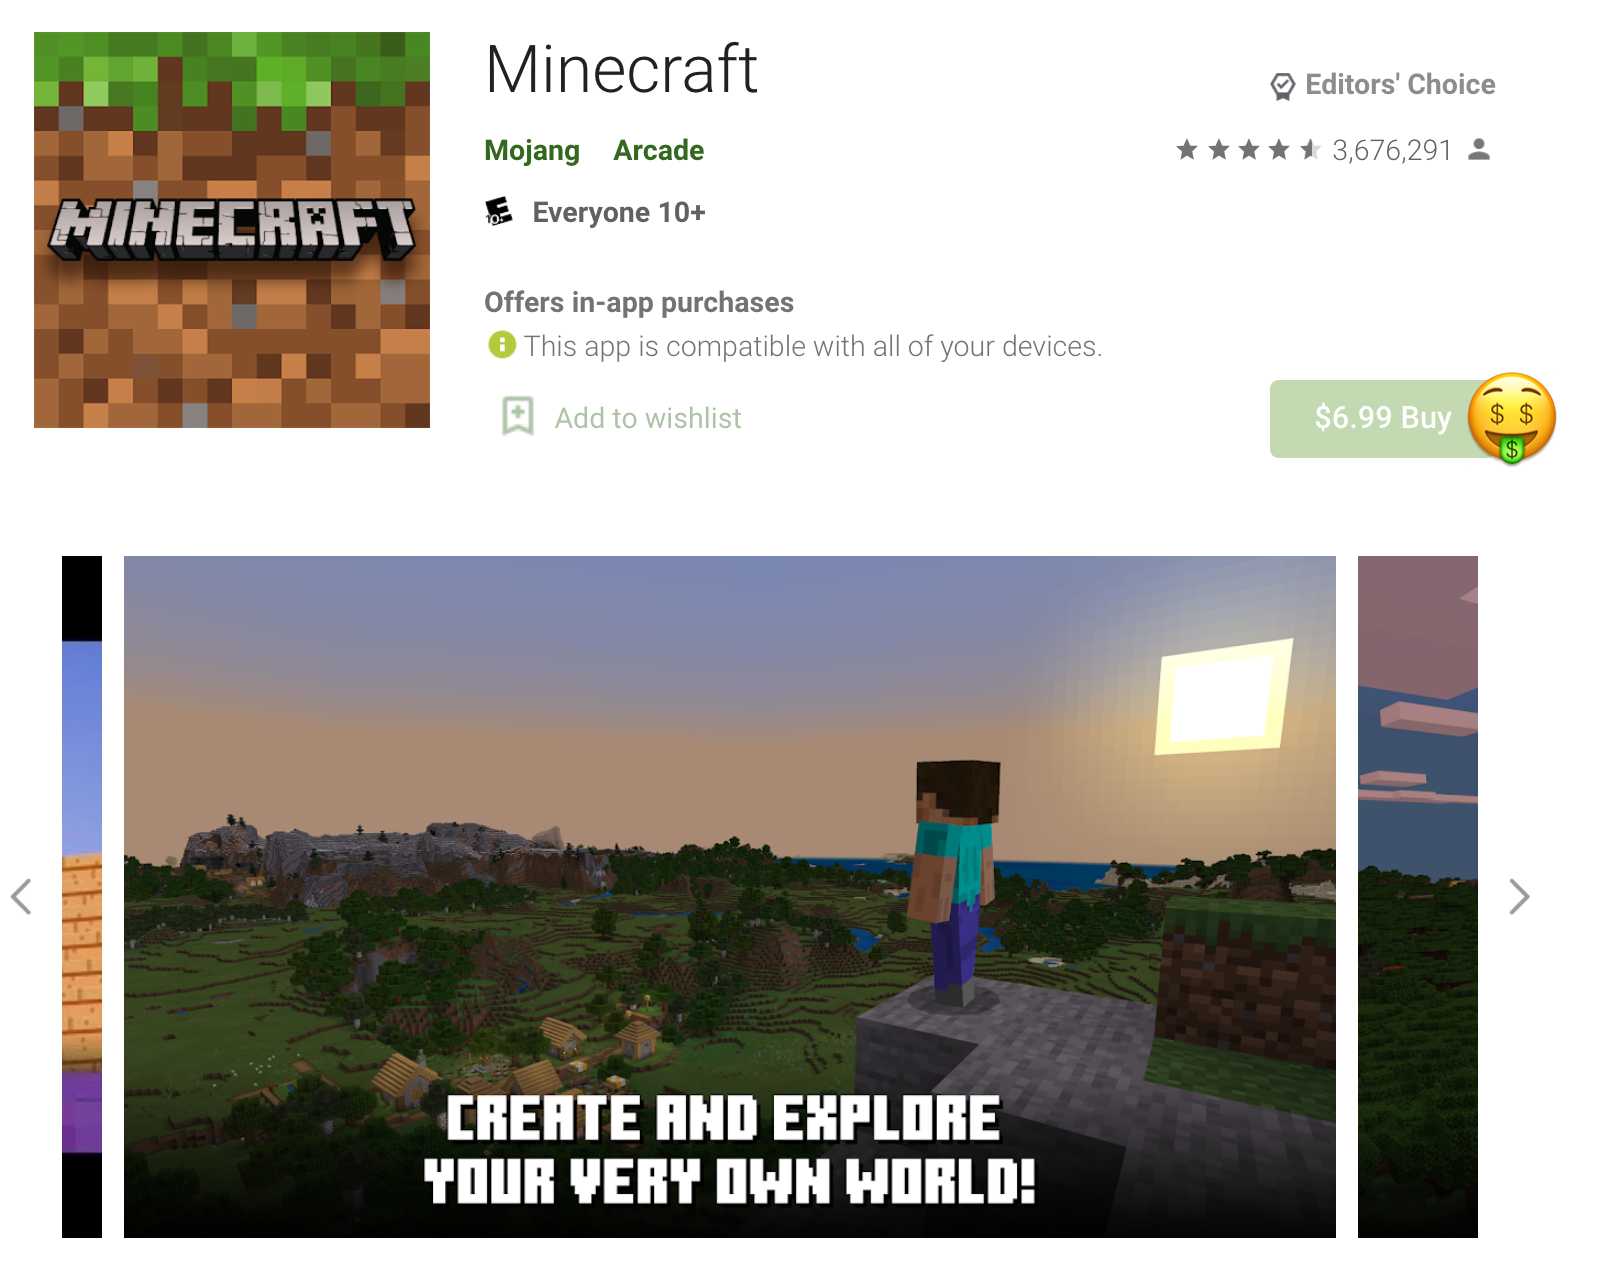


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

If you were to release an app, would you choose to go after a competitive category with many other apps? Or would you target a popular category with a high number of downloads? Or perhaps you can target a category which is both popular but also one where the downloads are spread out among many different apps. That way, even if it’s more difficult to discover among all the other apps, your app has a better chance of getting installed, right? Let’s analyse this with bar charts and scatter plots and figure out which categories are dominating the market.
*We can find the number of different categories like so:*

In [104]:
df_apps_clean.Category.nunique()

33

Which shows us that we there are 33 unique categories.
To calculate the number of apps per category we can use our old friend .value_counts()


In [106]:
top10_category = df_apps_clean.Category.value_counts()[:10]
top10_category

FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: Category, dtype: int64

**To visualise this data in a bar chart we can use the plotly express (our px) bar() function:**

In [107]:
bar = px.bar(x = top10_category.index, # index = category name
             y = top10_category.values)
 
bar.show()

Based on the number of apps, the Family and Game categories are the most competitive. Releasing yet another app into these categories will make it hard to get noticed.



But what if we look at it from a different perspective? What matters is not just the total number of apps in the category but how often apps are downloaded in that category. This will give us an idea of how popular a category is. First, we have to group all our apps by category and sum the number of installations:

In [108]:
category_installs = df_apps_clean.groupby('Category').agg({'Installs': pd.Series.sum})
category_installs.sort_values('Installs', ascending=True, inplace=True)

Then we can create a horizontal bar chart, simply by adding the orientation parameter:

### Vertical Bar Chart - Highest Competition (Number of Apps)

In [109]:
h_bar = px.bar(x = category_installs.Installs,
               y = category_installs.index,
               orientation='h')
 
h_bar.show()

**We can also add a custom title and axis labels like so:**

In [110]:
h_bar = px.bar(x = category_installs.Installs,
               y = category_installs.index,
               orientation='h',
               title='Category Popularity')
 
h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show()

Now we see that Games and Tools are actually the most popular categories. If we plot the popularity of a category next to the number of apps in that category we can get an idea of how concentrated a category is. Do few apps have most of the downloads or are the downloads spread out over many apps?

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

# Grouped Bar Charts: Free vs. Paid Apps per Category

**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.